In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir("/content/gdrive/My Drive/DataMiningProject")

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("data.csv")

In [4]:
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
print(X.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import numpy as np

# Check for NaN values in the training and test data
print(np.isnan(X_train).sum())  # Count of NaNs in training data
print(np.isnan(X_test).sum())   # Count of NaNs in test data

0
0


In [27]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

#model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))
#Talk about relu v sigmoid + why choose different hyperparameters


In [28]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5334 - loss: 1.5070 - val_accuracy: 0.6579 - val_loss: 1.4386
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6781 - loss: 1.4059 - val_accuracy: 0.8421 - val_loss: 1.2494
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7419 - loss: 1.2452 - val_accuracy: 0.9386 - val_loss: 1.0309
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8647 - loss: 1.0462 - val_accuracy: 0.9474 - val_loss: 0.9104
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9193 - loss: 0.9907 - val_accuracy: 0.9737 - val_loss: 0.8206
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9676 - loss: 0.8394 - val_accuracy: 0.9737 - val_loss: 0.7849
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9515 - loss: 0.8217 - val_accuracy: 0.9649 - val_loss: 0.7772
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9660 - loss: 0.8060 - val_accuracy: 0.973

In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.98


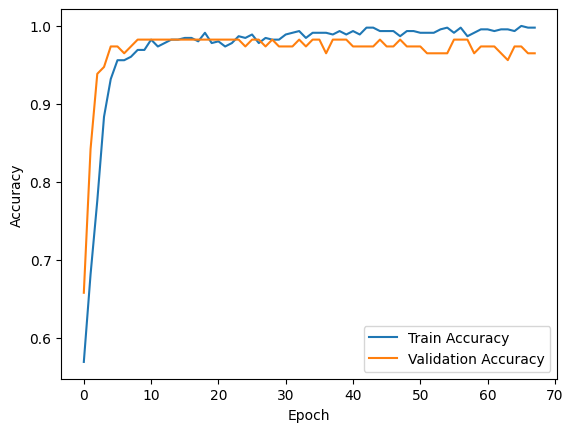

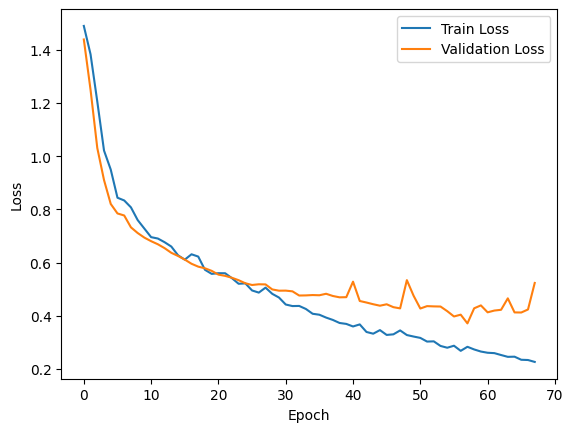

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#cnn vs MLP why MLP works better

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

model.save('mlp_model.h5')

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.ravel()
# Threshold probabilities at 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
print(f"y_test: {set(y_test)}")  # Should contain binary values (e.g., {0, 1})
print(f"y_pred: {set(y_pred)}")  # Should also contain binary values (e.g., {0, 1})


y_test: {0, 1}
y_pred: {0, 1}


In [ ]:
print(f"y_pred shape: {y_pred.shape}")


y_pred shape: (114,)


Accuracy: 0.99
Precision: 1.00
Recall: 0.98
Confusion Matrix:


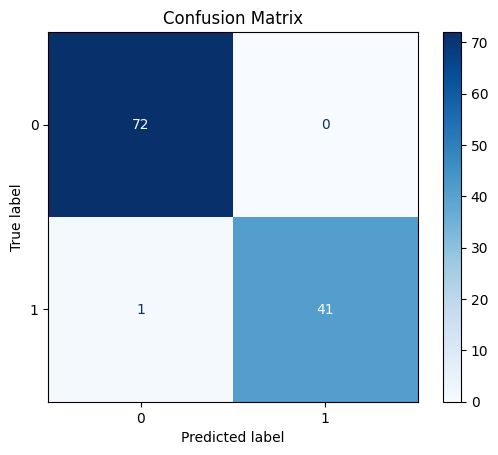

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # or PyTorch depending on your framework

input_sample = X_test[0:1]  # Example input (e.g., the first test sample)
target_class = np.argmax(model.predict(input_sample))  # Predicted class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [33]:
# Convert input_sample to a Tensor
input_tensor = tf.convert_to_tensor(input_sample)

# Use GradientTape to compute the gradient of the target output w.r.t. the input
with tf.GradientTape() as tape:
    tape.watch(input_tensor)
    predictions = model(input_tensor)
    target_output = predictions[0, target_class]

# Compute gradients
grads = tape.gradient(target_output, input_tensor)
# Convert gradients to absolute values for visualization
saliency_map = tf.math.abs(grads).numpy().squeeze()


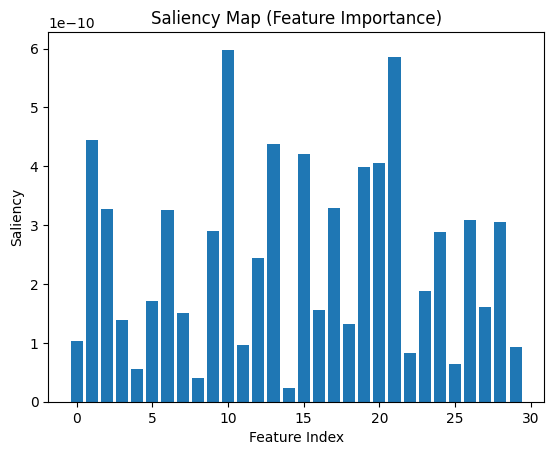

In [34]:
plt.bar(range(len(saliency_map)), saliency_map)
plt.title("Saliency Map (Feature Importance)")
plt.xlabel("Feature Index")
plt.ylabel("Saliency")
plt.show()
